## Stock Price Simulation
- fix date as 2022-06-01
- plot simulation, one graph for each of the stock (plot the true path on top)

In [1]:
import numpy as np
import pandas as pd

In [2]:
date = "2022-08-02"
sim_path = "../generated_data/final_1000/ss/"

file_path = sim_path + date + ".csv"

In [3]:
df = pd.read_csv(file_path)
df["date"] = pd.to_datetime(df["date"])
df = df.melt(id_vars = ["index", "date"], var_name= "stock", value_name="price")


In [4]:
g_df = df[(df["stock"] == "GOOGL" )].reset_index(drop = True)
m_df = df[(df["stock"] == "MSFT" )].reset_index(drop = True)
a_df = df[(df["stock"] == "AAPL" )].reset_index(drop = True)
g_df["index"] = pd.Categorical(g_df["index"])
m_df["index"] = pd.Categorical(m_df["index"])
a_df["index"] = pd.Categorical(a_df["index"])

In [5]:
g_mean_df = g_df.groupby("date").agg(price = ("price", np.mean)).reset_index()
m_mean_df = m_df.groupby("date").agg(price = ("price", np.mean)).reset_index()
a_mean_df = a_df.groupby("date").agg(price = ("price", np.mean)).reset_index()
g_mean_df

,date,price
0,2022-08-02,114.845624
1,2022-08-03,114.830847
2,2022-08-04,114.818863
3,2022-08-05,114.801037
4,2022-08-08,114.802484
...,...,...
252,2023-07-20,111.340726
253,2023-07-21,111.261612
254,2023-07-24,111.246441
255,2023-07-25,111.096737


In [6]:
df_true = pd.read_csv("stock_historical_prices.csv")
time_format = "%d/%m/%Y"
df_true = (
    df_true
    .rename(columns = {
        "Dates": "date",
        "GOOGL UW Equity": "GOOGL",
        "MSFT UW Equity": "MSFT",
        "AAPL UW Equity": "AAPL"
    })
    .melt(id_vars = ["date"], var_name= "stock", value_name="price")
)
df_true["date"] = pd.to_datetime(df_true["date"], format = time_format)
df_true = df_true[df_true["date"] > "2021-07-31"]

In [7]:
g_df_true = df_true[df_true["stock"] == "GOOGL"].reset_index(drop = True)
m_df_true = df_true[df_true["stock"] == "MSFT"].reset_index(drop = True)
a_df_true = df_true[df_true["stock"] == "AAPL"].reset_index(drop = True)
g_df_true

,date,stock,price
0,2021-08-02,GOOGL,134.855
1,2021-08-03,GOOGL,135.630
2,2021-08-04,GOOGL,135.126
3,2021-08-05,GOOGL,136.252
4,2021-08-06,GOOGL,135.739
...,...,...,...
322,2022-10-26,GOOGL,94.930
323,2022-10-27,GOOGL,92.220
324,2022-10-28,GOOGL,96.290
325,2022-10-31,GOOGL,94.510


In [8]:
from plotnine import *

# (
#     ggplot()
#     + geom_line(aes(x = "date", y = "price", color = "index"), show_legend = False, data = g_df)
#     + geom_line(aes(x = "date", y = "price"), show_legend = False, data = g_df_true)
#     + geom_line(aes(x = "date", y = "price"), show_legend = False, data = g_mean_df)
#     + labs(title = "Simulated Price Path of GOOGL on " + date)
#     + theme(figure_size=(16, 8))
# )

In [9]:
a_df_true

,date,stock,price
0,2021-08-02,AAPL,144.493
1,2021-08-03,AAPL,146.320
2,2021-08-04,AAPL,145.913
3,2021-08-05,AAPL,146.022
4,2021-08-06,AAPL,145.326
...,...,...,...
322,2022-10-26,AAPL,149.350
323,2022-10-27,AAPL,144.800
324,2022-10-28,AAPL,155.740
325,2022-10-31,AAPL,153.340


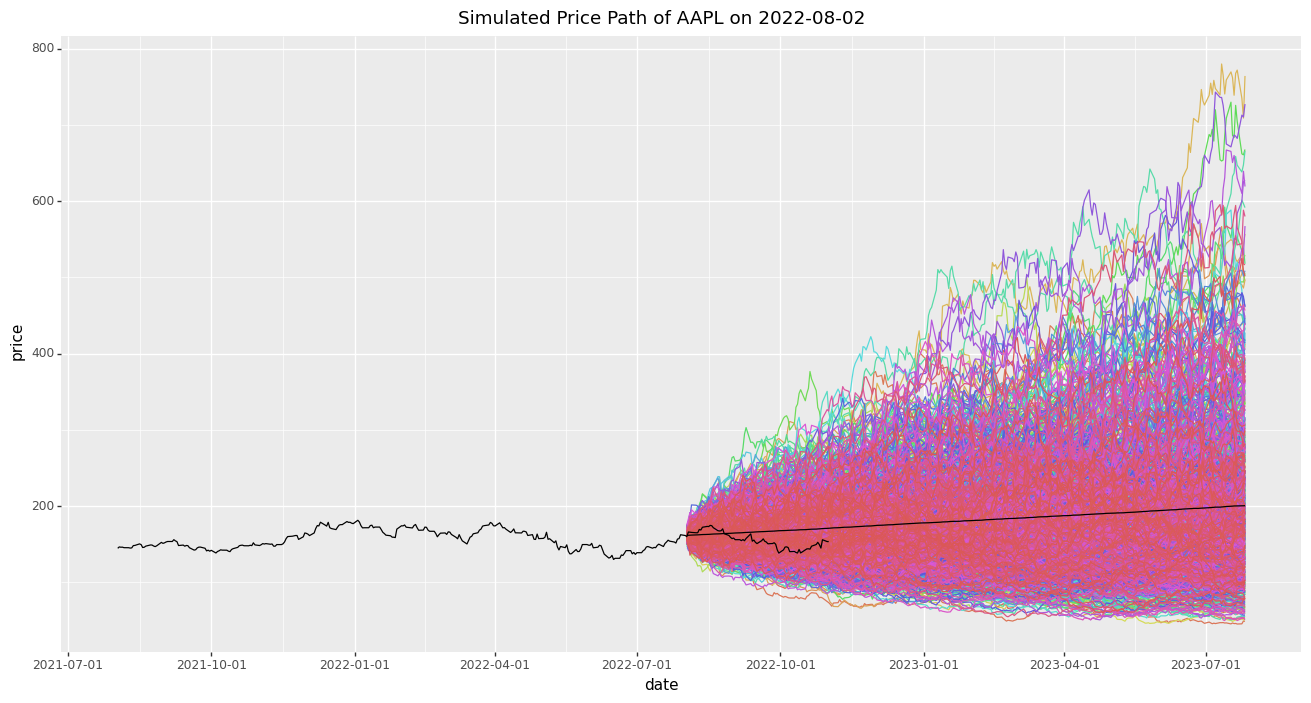

<ggplot: (181925516325)>

In [14]:
(
    ggplot()
    + geom_line(aes(x = "date", y = "price", color = "index"), show_legend = False, data = a_df)
    + geom_line(aes(x = "date", y = "price"), show_legend = False, data = a_df_true)
    + geom_line(aes(x = "date", y = "price"), show_legend = False, data = a_mean_df)
    + labs(title = "Simulated Price Path of AAPL on " + date)
    + theme(figure_size=(16, 8))
)

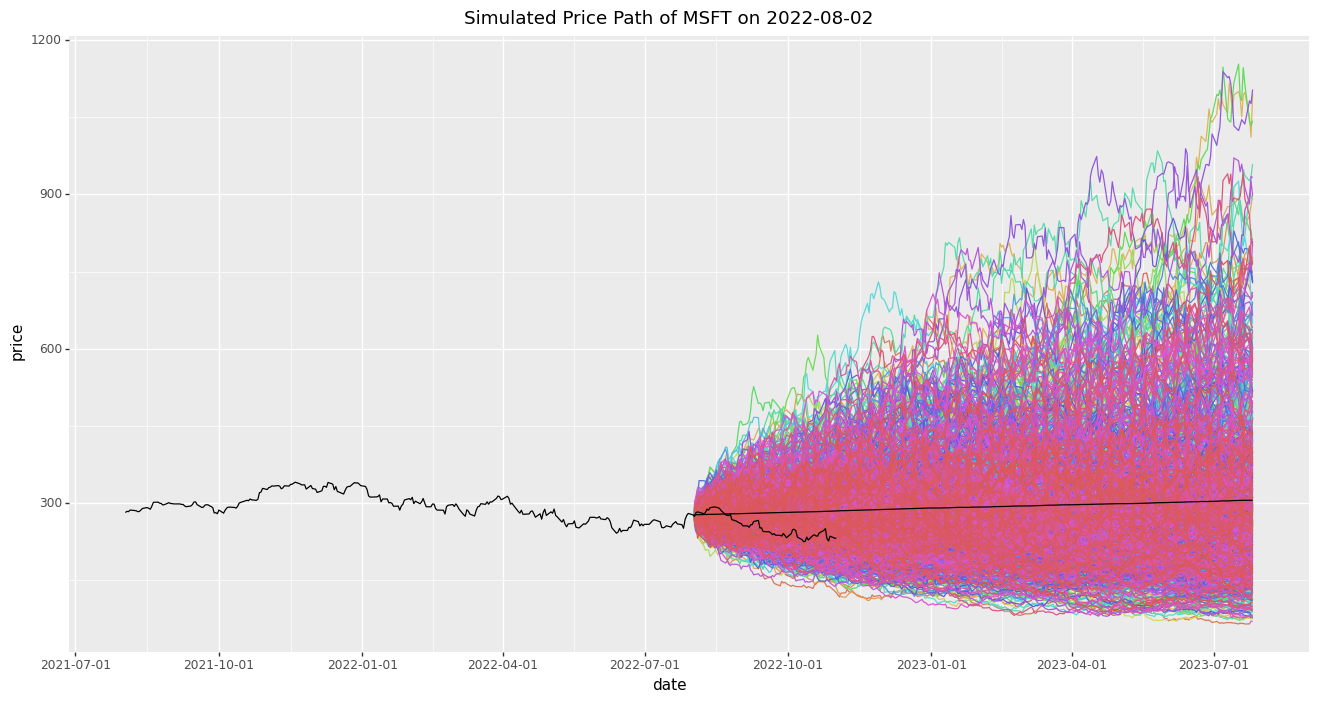

<ggplot: (181925034822)>

In [11]:
(
    ggplot()
    + geom_line(aes(x = "date", y = "price", color = "index"), show_legend = False, data = m_df)
    + geom_line(aes(x = "date", y = "price"), show_legend = False, data = m_df_true)
    + geom_line(aes(x = "date", y = "price"), show_legend = False, data = m_mean_df)
    + labs(title = "Simulated Price Path of MSFT on " + date)
    + theme(figure_size=(16, 8))
)

In [12]:
g_std = g_df.groupby("date").agg(price = ("price", np.std)).tail(1)
m_std = m_df.groupby("date").agg(price = ("price", np.std)).tail(1)
a_std = a_df.groupby("date").agg(price = ("price", np.std)).tail(1)

In [13]:
g_std, m_std, a_std

(                price
 date                 
 2023-07-26  58.007566,
                 price
 date                 
 2023-07-26  151.95692,
                 price
 date                 
 2023-07-26  99.563318)

- MC(                price
 date                 
 2023-07-26  61.986698,
                  price
 date                  
 2023-07-26  163.899049,
                  price
 date                  
 2023-07-26  106.318123)
- AV(                price
 date                 
 2023-07-26  61.335646,
                 price
 date                 
 2023-07-26  161.05822,
                  price
 date                  
 2023-07-26  104.584104)
 - (                price
 date                 
 2023-07-26  58.007566,
                 price
 date                 
 2023-07-26  151.95692,
                 price
 date                 
 2023-07-26  99.563318)

 :  GOOGL UW Equity_return   -0.000600
MSFT UW Equity_return    -0.000107
AAPL UW Equity_return     0.000375
dtype: float64
sigma:                         GOOGL UW Equity_return  MSFT UW Equity_return  AAPL UW Equity_return
GOOGL UW Equity_return                0.020375               0.017421               0.016761
MSFT UW Equity_return                 0.017421               0.018570               0.016392
AAPL UW Equity_return                 0.016761               0.016392               0.018683